In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 24,
          'figure.figsize': (8, 8),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params) 

<img src="./dual_pushpull.png">

El circuito de la figura es un mezclador push-pull realizado con MOSFET de doble compuerta.


Se lo utiliza como mezclador en un receptor superheterodino de AM simple conversión con FI en $1 MHz$ y sintonizado para recibir una portadora de $10 MHz$.

$V_s$, senoidal pura de $10 \mu V$ eficaces y $10 MHz$, representa la tensión de salida del amplificador de RF el cual se comporta como fuente de tensión ideal(Rg=0). 

$R_L$ representa la impedancia de entrada del amplificador de FI(resitiva pura).

$$V_{ol}= V_{ol}\ cos(w_{ol}\cdot t)$$    

siendo $V_{ol}=2\ V$ y $f_{ol}=11\ MHz$


En el punto en que se encuentra polarizados los elementos activos, el gráfico muestra el valor de $g_m$ (derivada de $Id$ con respecto a $V_{g1s}$) en funcion de $V_{g2s}$.

$$I_d= 2\frac{mA}{V}\ V_{g2s} + 4\frac{mA}{V} $$ 

(con $V_{g2s}$ medida en volts, $I_d$ resulta en $mA$).

Ningun elemento reactivo tiene perdidas y el $Q$ tanque de salida $Q_c = 10$.

La admitancia de entrada de ambos gates es nula.

La admitancia de salida del drain es nula.

Los tres bobinados del trafo de entrada son iguales entre si y se lo puede considerar un trafo ideal para todas las frecuencias de interes. Las polaridades estan indicadas en la figura.

Los tres bobinados del trafo de salida son iguales entre si y su secundario esta sintonizado a $1 MHz$.

Las polaridades estan indicadas en la figura.

$$Vdd=20V$$ 

Determinar:


1.  $g_c$: transconductancia de conversion de cada MOSFET
2.  $P_{RL}(1 MHz)$
3.  $P_{RL}(10 MHz)$	
4.  $P_{RL}(11 MHz)$

5. Por un problema de soldadura el capacitor C2 ''se abre'' y desaparece su efecto sobre el circuito. A partir de su desconexion determinar:

5. $P_{RL}(1 MHz)$
6. $P_{RL}(10 MHz)$	
7. $P_{RL}(11 MHz)$

In [70]:
# Estas funciones calculas las componentes de la serie de Fourier para una senal dada
# A cada función se pasa como argumento la señal x y el numero de armonico a calcular.
# El muestreo se define por la cantidad de muestras dentro del periodo de la señal x.


# Transformada Discreta de Fourier     
def DFT(x):
    N = len(x)
    print(N)
    X = list()
    for k in range(N):
        X.append( sum([s*np.exp(-2j*np.pi*n*k/N) for n,s in enumerate(x)]))
    return np.array(X)  
    


# Transformada Inversa Discreta de Fourier       
def IDFT(X):
    N = len(X)
    x = list()
    for n in range(N):
        x.append( sum([S*np.exp(2j*np.pi*k*n/N) for k,S in enumerate(X)]))
    return np.array(x)/N  



    
def freq(X, fs):
    N =  len(X)
    fo = np.arange(0,N/2,1) *fs/ N
    fo = np.append(fo,np.arange(-N/2,0,1) *fs/N )
    return fo

def tim(x, fs):
    return np.arange(0,len(x),1) /fs

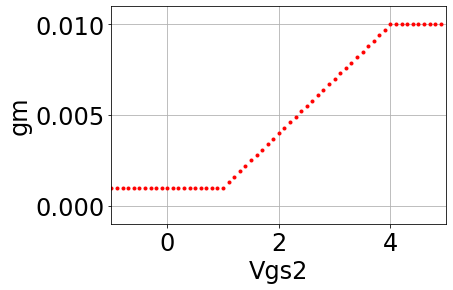

In [71]:
# Transferencia del dualFET
def gmd(v):
    i = list()
    for vi in v:
        if (vi < 1.)                : i.append(1e-3)
        elif (vi >= 1  and vi < 4)  : i.append((3e-3)*(vi-1)+1e-3) 
        else                        : i.append(10e-3) 
    return np.array(i)

# Plot de la transferencia del MOSFET
vs  = np.arange(-1.,5.,0.1)
gm  = gmd(vs)

plt.plot(vs,gm,'r.')
plt.axis([-1, 5, -1e-3, 11e-3])
plt.ylabel('gm')
plt.xlabel('Vgs2')
plt.grid()
plt.show()



In [133]:
# vs1
#Datos
Vs = 10e-6
fs = 10e6
ws  = 2*np.pi*fs

# Calculo de Vgs2
Vpol = 2.5
Vol  = 2 
fol  = 11e6
wol  = 2*np.pi*fol

# Ro
ro = 1e3
fo = 1e6
Qc = 10e6

L  = ro/(Qc*2*np.pi*fo)
C  = 1/(L*(2*np.pi*fo)**2)
print('.param L= {:1.2e} '.format(L))
print('.param C= {:1.2e} '.format(C))

C1  = 15e-12
XC1 = 1/(wol*C1*1j)
R1  = 1e3

Av  = 1/(1 + R1/XC1)

print(abs(Av))

Vgs1 = Vol*abs(Av)
print(Vgs1)

gmo = gmd([Vpol])[0]
gm1 = gmd([Vpol+Vgs1])[0] - gmd([Vpol])[0]
print('gm1= {:1.2e} + {:1.2e} cos(wol*t)'.format( gmo, gm1))

gc  = gm1/2
print('gc= {:1.2e} '.format( gc))

ids1 = gc *  Vs
io   = ids1 * 2


.param L= 1.59e-11 
.param C= 1.59e-03 
0.6942436063344007
1.3884872126688015
gm1= 5.50e-03 + 4.17e-03 cos(wol*t)
gc= 2.08e-03 


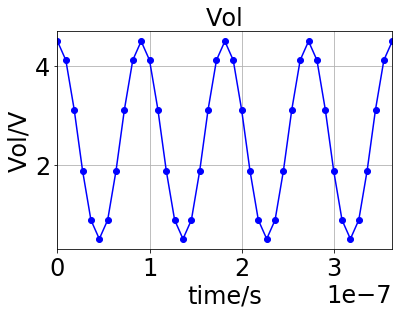

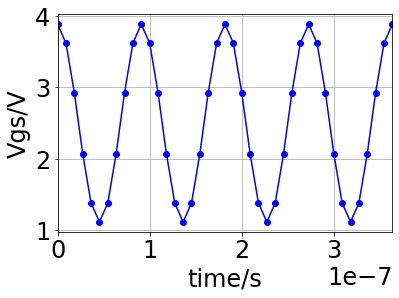

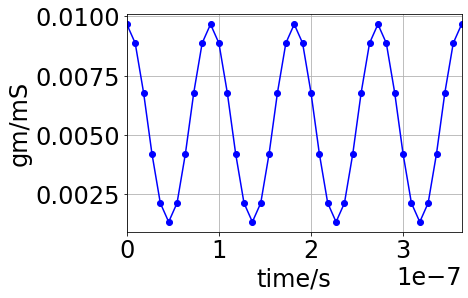

1100


/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


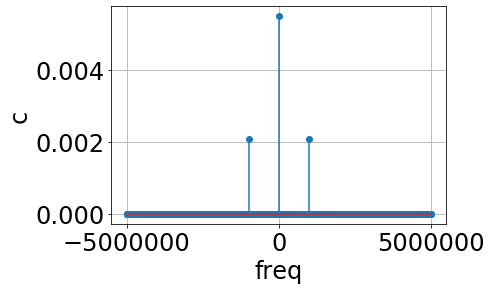

In [100]:
fsa   = 110e6 # sampleo
fmin  = 0.1e6   # frecuencia minima 
Ts    = 1/(fmin)


t   = np.arange(0,Ts,1/fsa)

vol   = Vpol + Vol*np.cos(wol*t)
plt.title('Vol')
plt.plot(t,vol, 'bo-')
plt.xlabel('time/s')
plt.ylabel('Vol/V')
plt.xlim(0, 4/fol)

plt.grid()
plt.show()




vgs1  = Vpol + abs(Av)*Vol*np.cos(wol*t)
vgs2  = Vpol + abs(Av)*Vol*np.cos(wol*t)
plt.plot(t,vgs1, 'bo-')
plt.xlabel('time/s')
plt.ylabel('Vgs/V')
plt.xlim(0, 4/fol)
plt.grid()
plt.show()

# Calculo de gm

gm1 = gmd(vgs1)
gm2 = gmd(vgs2)

plt.plot(t,gm1, 'bo-')
plt.xlabel('time/s')
plt.ylabel('gm/mS')
plt.xlim(0, 4/fol)
plt.grid()
plt.show()


Ygm1    = DFT(gm1) / len(gm1)


plt.stem( freq(gm1,fs) , np.abs(Ygm1))

plt.ylabel('c')
plt.xlabel('freq')
#plt.ylim(-0.1, 0.8)
plt.grid()
plt.show()



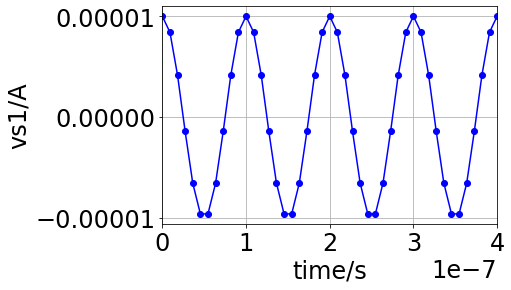

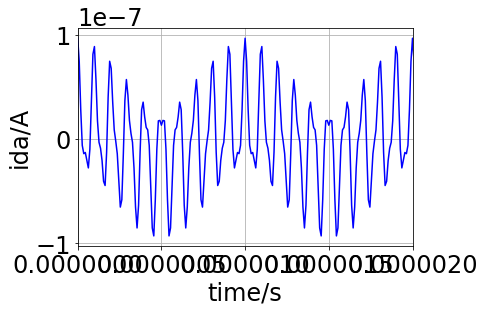

1100


/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


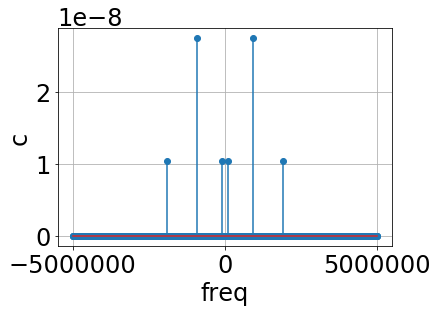

In [108]:


vs1   =   Vs*np.cos(ws*t)
vs2   =  -Vs*np.cos(ws*t)

plt.plot(t,vs1, 'bo-')
plt.xlabel('time/s')
plt.ylabel('vs1/A')
plt.xlim(0, 4/fs)
plt.grid()
plt.show()

id1  = gm1*vs1
id2  = gm1*vs2
plt.plot(t,id1, 'b-')
plt.xlabel('time/s')
plt.ylabel('ida/A')
plt.xlim(0, 20/fs)
plt.grid()
plt.show()


Yid1    = DFT(id1) / len(id1)


plt.stem( freq(id1,fs) , np.abs(Yid1))

plt.ylabel('c')
plt.xlabel('freq')
#plt.ylim(-0.1, 0.8)
plt.grid()
plt.show()